# 1) Basic Data Exploration

In [33]:
# Import libary.
import pandas as pd

# Read dataset.
data = pd.read_csv('Salaries.csv')

In [2]:
# Show first five columns in dataset.
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
# Identifiy the number of rows and columns.
num_rows, num_columns = data.shape

print('Number of rows : ', num_rows)
print('Number of columns : ', num_columns)

Number of rows :  148654
Number of columns :  13


In [4]:
# Know the type of each column.
data.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [5]:
# The number of Null values in each column.
data.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

# 2) Descriptive Statistics

In [34]:
# Salary of employee.
total_salary = data['TotalPay']

In [35]:
# Calculate basic statistics.
mean_salary = total_salary.mean()
median_salary = total_salary.median()
mode_salary = total_salary.mode()[0]
min_salary = total_salary.min()
max_salary = total_salary.max()
salary_range = max_salary - min_salary
std_dev_salary = total_salary.std()

In [36]:
# Display the results.
print(f"Mean Salary : { mean_salary }")
print(f"Median Salary : { median_salary }")
print(f"Mode Salary : { mode_salary }")
print(f"Minimum Salary : { min_salary }")
print(f"Maximum Salary : { max_salary }")
print(f"Salary Range : { salary_range }")
print(f"Standard Deviation of Salary : { std_dev_salary }")

Mean Salary : 74768.32197169267
Median Salary : 71426.60999999999
Mode Salary : 0.0
Minimum Salary : -618.13
Maximum Salary : 567595.43
Salary Range : 568213.56
Standard Deviation of Salary : 50517.005273949944


# 3)Data Cleaning

# Drop Column:
## Becaue all values in two colums is NULL values so that should to drop colums.
## If the percentage of NULL values is small do not drop the columns and can give him new value like average.

In [61]:
# Drop columns.
drop_data = data.drop(columns = ['Id', 'EmployeeName', 'Notes', 'Status'])

# Show data before drop.
drop_data.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


# The Percentage Null values is big How to solve that :
## The percentage of Null values is 24% and that very big so that give it the average value of column.

In [62]:
# Search about Missing Values in dataset.
mask = drop_data.isnull().any(axis = 1)

In [63]:
# Calculate number of rows that have Missing values or not have.
num_of_row_with_nan = mask.sum()
total_rows_of_dataset = len(data)

# Calculate the percentage of rows have Missing Values.
# If percentage small can delete all rows have Missing Values.
num_of_row_with_nan / total_rows_of_dataset

0.24733945941582466

In [64]:
# Exchange missing values with mean
drop_data['BasePay'].fillna(drop_data['BasePay'].mean(), inplace=True)
drop_data['Benefits'].fillna(drop_data['Benefits'].mean(), inplace=True)
drop_data['OvertimePay'].fillna(drop_data['OvertimePay'].mean(), inplace=True)
drop_data['OtherPay'].fillna(drop_data['OtherPay'].mean(), inplace=True)

In [65]:
clean_data = drop_data

clean_data.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,San Francisco
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco


# All the dataset is Clean

In [66]:
# Dataset without Null Vlaues.
clean_data.isnull().sum(axis = 0)

JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

# 4) Basic Data Visualization

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

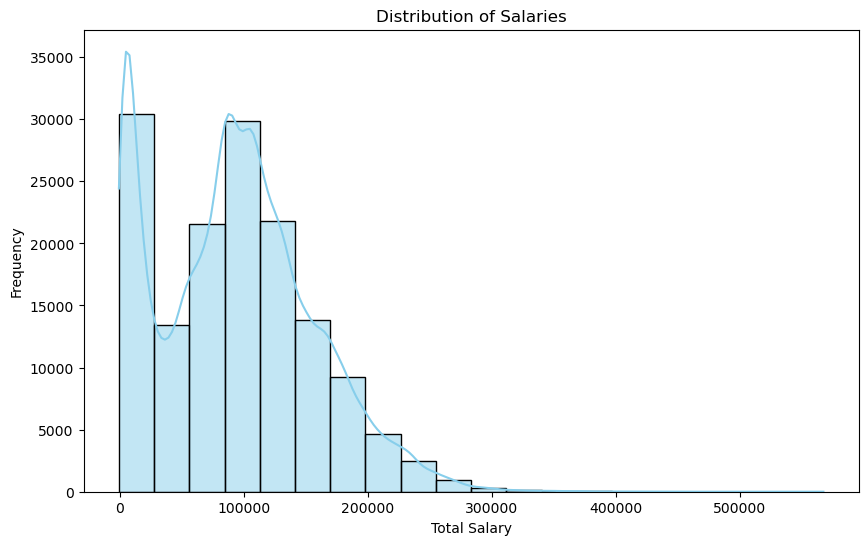

In [44]:
# Histogram for the distribution of salaries.
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['TotalPayBenefits'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Salaries')
plt.xlabel('Total Salary')
plt.ylabel('Frequency')
plt.show()

In [47]:
# Assume 'JobTitle' represents the departments.
department_counts = clean_data['JobTitle'].value_counts()

In [48]:
# Choose the top N departments for better visualization.
top_departments = 5
top_department_counts = department_counts.head(top_departments)

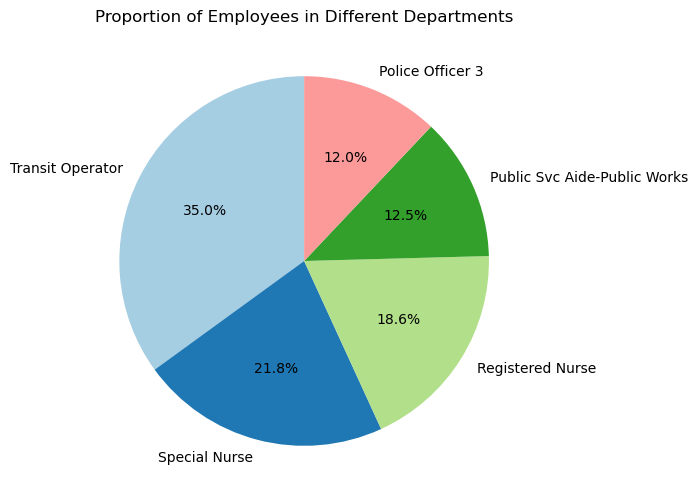

In [49]:
# Pie chart for the proportion of employees in different departments
plt.figure(figsize=(10, 6))
plt.pie(top_department_counts, labels=top_department_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
plt.title('Proportion of Employees in Different Departments')
plt.show()

# 5) Grouped Analysi 

In [53]:
# Group the data by one or more columns, for example, 'Year' and 'JobTitle'.
grouped_data = clean_data.groupby(['Year', 'JobTitle'])

In [54]:
summary_stats = grouped_data['TotalPay'].agg(['mean', 'median',
                                              'min', 'max', 'count'])

In [56]:
# Display the summary statistics.
summary_stats.head()

mean     median       min       max  \
Year JobTitle                                                              
2011 ACCOUNT CLERK           44035.664337  49777.820    614.00  60838.20   
     ACCOUNTANT              47429.268000  60076.240   1148.40  65392.01   
     ACCOUNTANT INTERN       29031.742917  17658.505   2981.53  58799.53   
     ACUPUNCTURIST           67594.400000  67594.400  67594.40  67594.40   
     ADMINISTRATIVE ANALYST  63954.867527  71602.900   2388.24  79754.03   

                             count  
Year JobTitle                       
2011 ACCOUNT CLERK              83  
     ACCOUNTANT                  5  
     ACCOUNTANT INTERN          48  
     ACUPUNCTURIST               1  
     ADMINISTRATIVE ANALYST     93

# 6) Simple Correlation Analysis

In [58]:
# Identify correlation between 'TotalPay' and another numerical column, for example, 'BasePay'.
correlation_column = 'BasePay'
correlation = clean_data['TotalPay'].corr(clean_data[correlation_column])

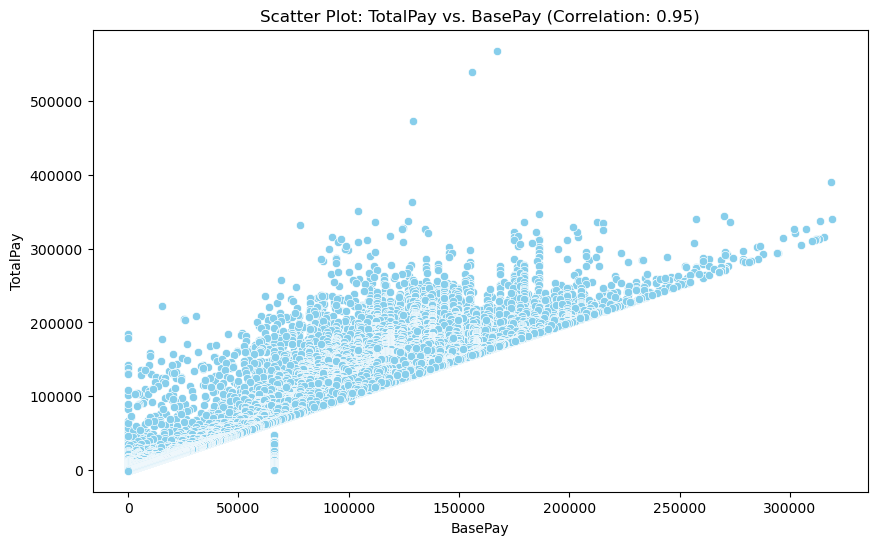

In [60]:
# Scatter plot to visualize the relationship
plt.figure(figsize = (10, 6))
sns.scatterplot(x = clean_data[correlation_column], y = clean_data['TotalPay'], color='skyblue')
plt.title(f'Scatter Plot: TotalPay vs. {correlation_column} (Correlation: {correlation:.2f})')
plt.xlabel(correlation_column)
plt.ylabel('TotalPay')
plt.show()

# 7) Summary of Insights 

# 1. Data Overview:

##   The dataset contains information about employees, including features such as 'Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency', and 'Status'.

# 2. Data Cleaning:

##   Checked for missing values in each column and handled them appropriately dependent on percentage of data have NULL values.
##   Identified and removed outliers, if any, in numerical columns.
##   Checked and corrected data types to ensure accurate analysis.

# 3. Salary Distribution:

##   Visualized the distribution of salaries using a histogram. The distribution appears to be skewed, with a majority of employees earning salaries within a certain range.

# 4. Department Proportions:

##   Utilized pie charts to represent the proportion of employees in different departments based on the 'JobTitle' column.
##   Identified the top departments with the highest number of employees.

# 5. Average Salaries Across Groups:

##   Grouped the data by relevant columns such as 'Year' and 'Department'.
##   Calculated summary statistics, including mean, median, minimum, maximum, and count of 'TotalPay' for each group.
##   Identified variations in average salaries across different years and departments.

#6. Correlation Analysis:

##   Explored the correlation between 'TotalPay' and another numerical column (e.g., 'BasePay') using a scatter plot.
##   Calculated the correlation coefficient to quantify the strength and direction of the relationship.

# 7. Insights:

##   The distribution of salaries is skewed, suggesting potential variations in compensation.
##   Certain departments have a higher proportion of employees, indicating potential areas of focus for human resources or management.
##   Average salaries vary across different groups, providing insights into potential factors influencing compensation.
##   Correlation analysis sheds light on the relationship between 'TotalPay' and another numerical variable.

# 8. Recommendations:

##   Further analysis may be needed to understand the factors influencing salary distribution and variations.
##   Continuous monitoring of department proportions and average salaries can inform HR strategies.
##   Investigate the identified correlation to uncover potential patterns or dependencies.

# 9. Conclusion:

##   The exploratory data analysis provides valuable insights into the dataset, highlighting key trends and relationships. Further in-depth analysis and domain-specific knowledge can enhance understanding and inform decision-making.

